In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

import simplejson

import numpy as np

In [2]:
with open("../data/rmsle_log.txt", "r") as in_file:
    read_file = in_file.read()

parent_list = simplejson.loads(read_file)

In [96]:
medians = []
mins = []
maxs = []
means = []

validation_set = [0.1572, 0.1445, 0.1355, 0.1203]

for item in parent_list:
    temp = np.array(sorted(item))
    medians.append(temp[len(temp) // 2])
    means.append(temp.mean())
    mins.append(temp.min())
    maxs.append(temp.max())
    
np.array(means)

temp_means = [item for item in means if item < 1.0]
temp_mins = [item for item in mins if item < 1.0]
temp_maxs = [item for item in maxs if item < 1.0]

In [97]:
for idx in range(len(means)):
    if means[idx] > 0.24:
        means[idx] = np.array(temp_means).mean()
        
    if mins[idx] > 0.24:
        mins[idx] = np.array(temp_mins).mean()
        
    if maxs[idx] > 0.24:
        maxs[idx] = np.array(temp_maxs).mean()

In [98]:
for idx, item in enumerate(medians):
    print idx, item

0 0.195004623308
1 0.197501969534
2 0.194528695057
3 0.187780566501
4 0.177003589847
5 0.172721703505
6 0.178716543661
7 0.170177776467
8 0.170624744538
9 0.17372592031
10 0.169818737539
11 0.168402891632
12 0.167441526795
13 0.17076055536
14 0.16326893469
15 0.169457053296
16 512331724.762
17 0.159957234152
18 0.158712526449
19 0.150022542188
20 0.150487608962
21 0.146242693259
22 0.144820029369
23 0.146536548442
24 0.134198792436
25 0.139699864639
26 0.134722427335
27 0.141061256634
28 0.137929313291
29 0.140352268561
30 0.146830719157


In [99]:
def pop_sixteen():
    means.pop(16)
    medians.pop(16)
    mins.pop(16)
    maxs.pop(16)
    
pop_sixteen()

In [108]:
x = np.arange(1, len(medians)+1)
test_x = np.arange(1, len(medians)+10, 10)

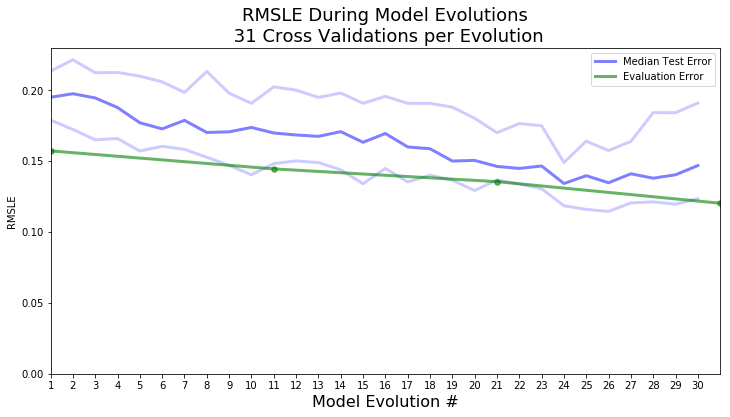

In [127]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(x, medians, alpha=0.5, lw=3, color="blue", label="Median Test Error")
ax.plot(x, maxs, alpha=0.2, lw=3, color="blue")
ax.plot(x, mins, alpha=0.2, lw=3, color="blue")
ax.plot(test_x, validation_set, alpha=0.6, lw=3, color="green", label="Evaluation Error")
ax.scatter(test_x, validation_set, alpha=0.6, s=30, color="green")
ax.set_xlim(1,31)
ax.set_ylim(0, 0.23)
ax.set_title("RMSLE During Model Evolutions\n 31 Cross Validations per Evolution", size=18)
ax.set_xlabel("Model Evolution #", size=16)
ax.set_ylabel("RMSLE")
ax.set_xticks(x)
ax.legend()